## Kyeri-Emrah-tetA-ODE-model.ipynb
by ChatGPT and Rohan Maddamsetti

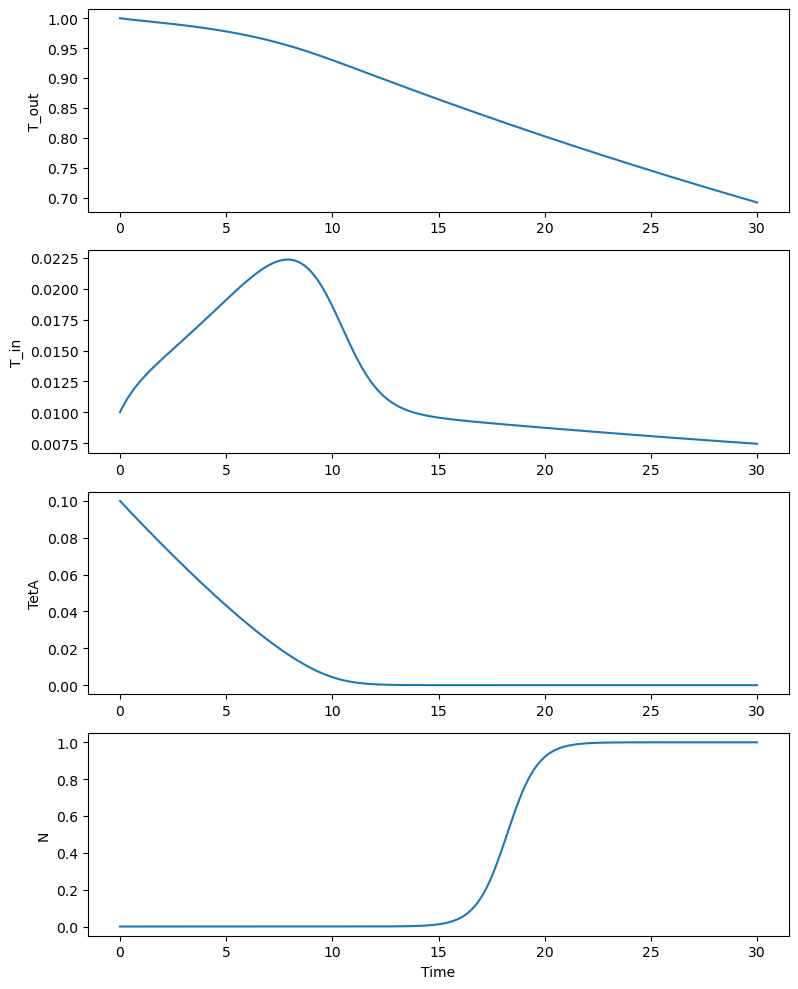

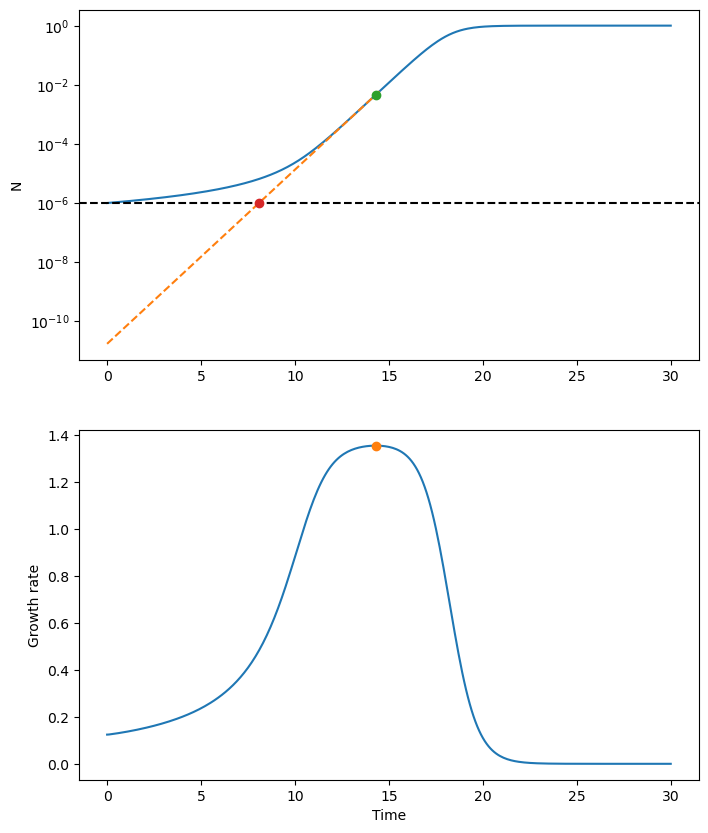

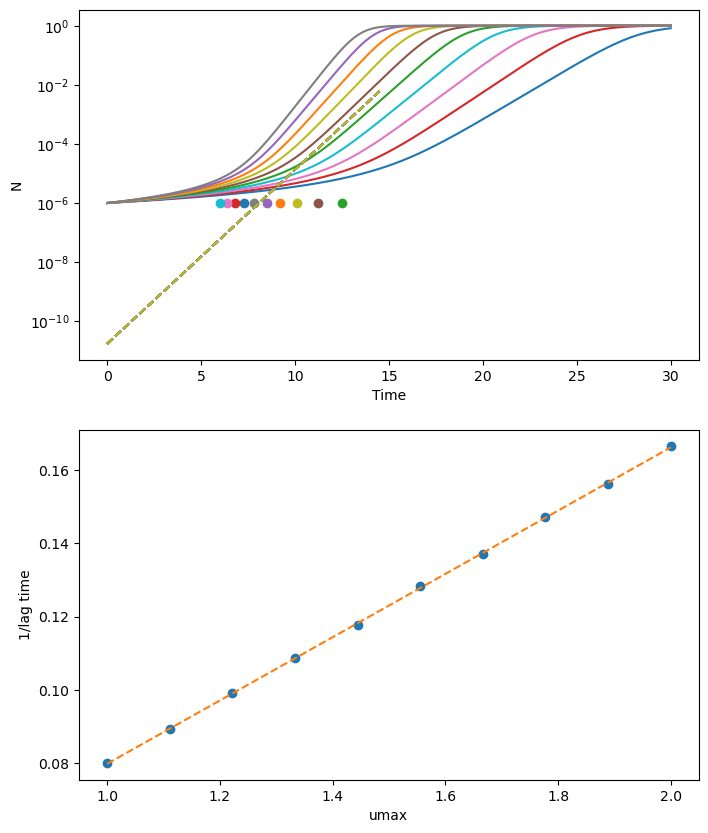

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Define the ODE function
def tetlag(y, t, umax, kT, kb, h, keff, kA, kim, beta, theta, g):
    To, Ti, A, N = y

    mu = umax * kT / (kT + Ti) * (kb ** h) / (kb ** h + A ** h)

    dTo_dt = keff * A * Ti / (kA + Ti) - kim * (To - Ti)
    dTi_dt = -keff * A * Ti / (kA + Ti) + kim * (To - Ti) - mu * Ti
    dA_dt = beta * theta * g - mu * A
    dN_dt = mu * (1 - N) * N

    return [dTo_dt, dTi_dt, dA_dt, dN_dt]

# Initial states and parameters
tspan = np.arange(0, 30.1, 0.1)  # hours
y0 = [1, 0.01, 0.1, 10 ** -6]   # To, Ti, A, N

umax = 1.5
kT = 0.1
kb = 0.01
h = 1
keff = 100
kA = 10
kim = 0.015
beta = 10 ** -5
theta = 0.008
g = 100

# ODE simulations
result = odeint(tetlag, y0, tspan, args=(umax, kT, kb, h, keff, kA, kim, beta, theta, g))

To = result[:, 0]
Ti = result[:, 1]
A = result[:, 2]
N = result[:, 3]

# Plotting results
titles = ["T_out", "T_in", "TetA", "N"]
plt.figure(1, figsize=(8, 10))
for i in range(4):
    plt.subplot(4, 1, i + 1)
    plt.plot(tspan, result[:, i])
    plt.ylabel(titles[i])
    if i == 3:
        plt.xlabel("Time")
plt.tight_layout()

# Finding lag time
def findlagtime(t, N):
    GR = np.gradient(np.log(N), t[1] - t[0])
    GRmax_idx = np.argmax(GR)
    GRmax = GR[GRmax_idx]
    tpart = t[: GRmax_idx + 3]
    maxgrowth = np.exp(GRmax * (tpart - t[GRmax_idx])) * N[GRmax_idx]
    lag_idx = np.argmax(maxgrowth >= N[0])
    lagtime = t[lag_idx]
    return GR, GRmax, GRmax_idx, maxgrowth, lag_idx, lagtime

GR, GRmax, GRmax_idx, maxgrowth, lag_idx, lagtime = findlagtime(tspan, N)

plt.figure(2, figsize=(8, 10))
plt.subplot(211)
plt.semilogy(tspan, N)
plt.plot(tspan[: GRmax_idx + 3], maxgrowth, '--')
plt.axhline(N[0], color='k', linestyle='--')
plt.plot(tspan[GRmax_idx], N[GRmax_idx], 'o')
plt.plot(lagtime, N[0], 'o')
plt.ylabel('N')

plt.subplot(212)
plt.plot(tspan, GR)
plt.plot(tspan[GRmax_idx], GRmax, 'o')
plt.ylabel('Growth rate')
plt.xlabel('Time')

# umax vs 1/lag time
repeats = 10
lags = np.zeros(repeats)
umaxs = np.linspace(1, 2, repeats)

plt.figure(10, figsize=(8, 10))
plt.subplot(211)
for rp in range(repeats):
    umax = umaxs[rp]
    result = odeint(tetlag, y0, tspan, args=(umax, kT, kb, h, keff, kA, kim, beta, theta, g))
    GR, _, _, _, _, lagtime = findlagtime(tspan, result[:, 3])
    lags[rp] = lagtime
    plt.semilogy(tspan, result[:, 3])
    plt.plot(tspan[: GRmax_idx + 3], maxgrowth, '--')
    plt.plot(lagtime, N[0], 'o')
plt.xlabel('Time')
plt.ylabel('N')

plt.subplot(212)
p = np.polyfit(umaxs, 1. / lags, 1)
plt.plot(umaxs, 1. / lags, 'o')
plt.plot(umaxs, np.polyval(p, umaxs), '--')
plt.xlabel('umax')
plt.ylabel('1/lag time')

plt.show()
